<a href="https://colab.research.google.com/github/hansungkim1998/Machine_Learning/blob/master/hkim827_cs4641hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
### Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import timeit
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, svm, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm

# Import datasets
from sklearn.datasets import load_wine

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
### Load Dataset 1
def load_dataset1(random_state=42):
  df = pd.read_csv('/content/drive/My Drive/College/!Year 3/!Spring 2019/CS 4641/Supervised Learning/weatherAUS.csv')
  
  # Preprocess data
  df.count().sort_values()
  df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)
  df.shape
  df = df.dropna(how='any')
  df.shape
  
  # Remove outliers
  z = np.abs(stats.zscore(df._get_numeric_data()))
  df= df[(z < 3).all(axis=1)]
  
  # Replace yes/no with 1/0
  df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
  df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
  
  # Convert directional values to integers
  categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
  for col in categorical_columns:
    df[col].replace({'N': 1, 'NNE': 2, 'NE': 3, 'ENE': 4,
                     'E': 5, 'ESE': 6, 'SE': 7, 'SSE': 8,
                     'S': 9, 'SSW': 10, 'SW': 11, 'WSW': 12,
                     'W': 13, 'WNW': 14, 'NW': 15, 'NNW': 16}, inplace = True)
  
  # Standardize the data
  scaler = preprocessing.MinMaxScaler()
  scaler.fit(df)
  df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
  df.iloc[4:10]
  
  # Pick Important Features
  df = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
           'WindDir9am', 'WindDir3pm', 'Humidity9am', 'Humidity3pm', 
           'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
           'RainToday', 'RainTomorrow']]
  x = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
           'WindDir9am', 'WindDir3pm', 'Humidity9am', 'Humidity3pm', 
           'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
  y = df[['RainTomorrow']]
  
  # Split Training Set and Test Set
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.02, random_state = random_state)
  x_train, x_test, y_train, y_test = train_test_split(x_test, y_test, test_size = 0.2, random_state = random_state)
  
  return x_train, x_test, y_train, y_test

In [0]:
### Load Dataset2
def load_dataset2(random_state=42):
  x, y = load_wine(return_X_y=True)
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = random_state)
  
  return x_train, x_test, y_train, y_test

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    start = timeit.default_timer()
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    print(train_scores_mean)
    print(test_scores_mean)
    
    plt.legend(loc="lower right")
    plt.grid()
    print('Runtime: ', timeit.default_timer() - start)
    return plt


# Decision Tree

In [0]:
# Decision Tree Algorithm
def run_decision_tree(x_train, x_test, y_train, y_test, 
                       max_depth=None, min_samples_leaf=5, pruning=0):
  clf = DecisionTreeClassifier(max_depth=max_depth, 
                               min_samples_leaf=5,
                               min_impurity_decrease=pruning)
  clf.fit(x_train, y_train)
  
  train_expect = y_train
  train_predict = clf.predict(x_train)
  
  test_expect = y_test
  test_predict = clf.predict(x_test)
  
  return (metrics.accuracy_score(train_expect, train_predict), 
          metrics.accuracy_score(test_expect, test_predict))

In [0]:
### Decision Tree Changing Max Depth
def decision_tree_change_depth(x_train, x_test, y_train, y_test, pruning=0, graph_title=''):
  start = timeit.default_timer()
  max_depths = range(1, 15, 1)
  train_accuracies = []
  test_accuracies = []
  
  for i in tqdm(max_depths):
    train_accuracy, test_accuracy = run_decision_tree(
        x_train, x_test, y_train, y_test, max_depth=i, pruning = pruning)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
  plt.plot(max_depths, train_accuracies, 'o-')
  plt.plot(max_depths, test_accuracies, 'o-')
  plt.legend(['Training Accuracy', 'Test Accuracy'])
  plt.xlabel('Max Depth')
  plt.ylabel('Accuracy')
  if pruning != 0:
    plt.title(graph_title + ': Decision Tree (With Pruning)')
  else:
    plt.title(graph_title + ': Decision Tree')
  plt.grid()
  plt.show()
  
  print (train_accuracies)
  print (test_accuracies)
  print('Runtime: ', timeit.default_timer() - start)

100%|██████████| 14/14 [00:00<00:00, 75.71it/s]


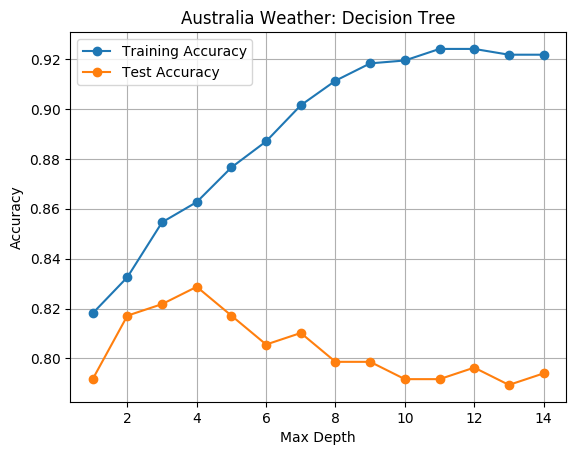

100%|██████████| 14/14 [00:00<00:00, 101.76it/s]

[0.8180764774044033, 0.8325608342989571, 0.854577056778679, 0.8626882966396292, 0.8765932792584009, 0.8870220162224797, 0.9015063731170336, 0.9113557358053302, 0.9183082271147162, 0.9194669756662804, 0.9241019698725377, 0.9241019698725377, 0.921784472769409, 0.921784472769409]
[0.7916666666666666, 0.8171296296296297, 0.8217592592592593, 0.8287037037037037, 0.8171296296296297, 0.8055555555555556, 0.8101851851851852, 0.7986111111111112, 0.7986111111111112, 0.7916666666666666, 0.7916666666666666, 0.7962962962962963, 0.7893518518518519, 0.7939814814814815]
Runtime:  0.5229714670003887


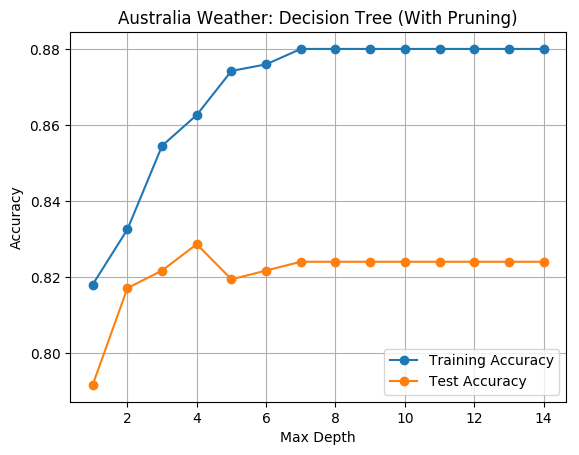

[0.8180764774044033, 0.8325608342989571, 0.854577056778679, 0.8626882966396292, 0.8742757821552724, 0.8760139049826188, 0.8800695249130939, 0.8800695249130939, 0.8800695249130939, 0.8800695249130939, 0.8800695249130939, 0.8800695249130939, 0.8800695249130939, 0.8800695249130939]
[0.7916666666666666, 0.8171296296296297, 0.8217592592592593, 0.8287037037037037, 0.8194444444444444, 0.8217592592592593, 0.8240740740740741, 0.8240740740740741, 0.8240740740740741, 0.8240740740740741, 0.8240740740740741, 0.8240740740740741, 0.8240740740740741, 0.8240740740740741]
Runtime:  0.4673479879993465


In [119]:
### Decision Tree on Dataset 1
x_train, x_test, y_train, y_test = load_dataset1()
decision_tree_change_depth(x_train, x_test, y_train, y_test, graph_title='Australia Weather')
decision_tree_change_depth(x_train, x_test, y_train, y_test, pruning=0.002, graph_title='Australia Weather')

[0.99651163 0.98625    0.97755532 0.96940912 0.96373117]
[0.7599537  0.78425926 0.7849537  0.79537037 0.79722222]
Runtime:  1.925064373999703


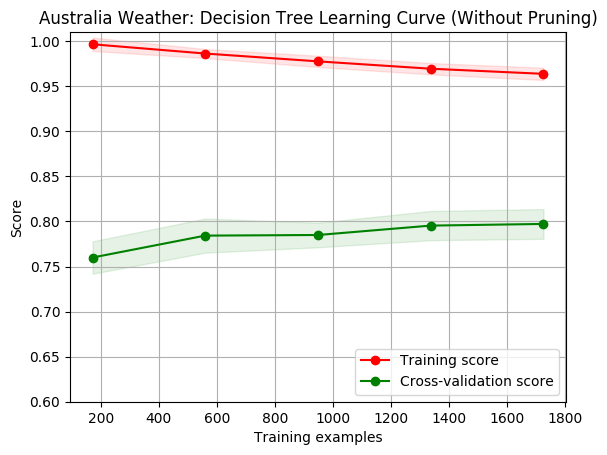

[0.99767442 0.97767857 0.94973656 0.94038893 0.91662804]
[0.76481481 0.78171296 0.80046296 0.81597222 0.82083333]
Runtime:  0.3730878799997299


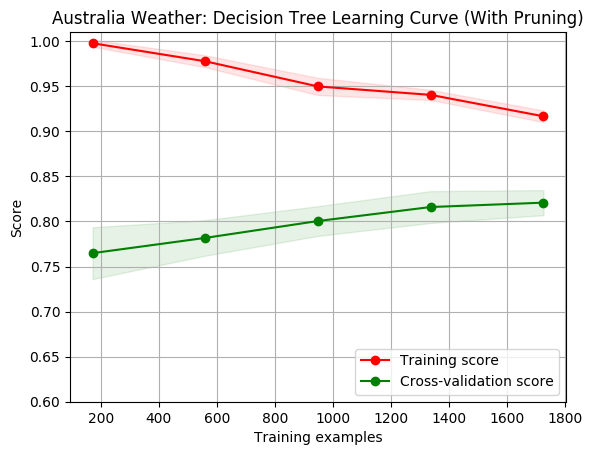

In [120]:
### Decision Tree Learning Curve Dataset 1
x_train, x_test, y_train, y_test = load_dataset1()
# Without Pruning
plot_learning_curve(DecisionTreeClassifier(max_depth=10, min_samples_leaf=1),
                   'Australia Weather: Decision Tree Learning Curve (Without Pruning)',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.6, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()
# With Pruning
plot_learning_curve(DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_impurity_decrease=0.001),
                   'Australia Weather: Decision Tree Learning Curve (With Pruning)',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.6, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()

100%|██████████| 14/14 [00:00<00:00, 608.01it/s]


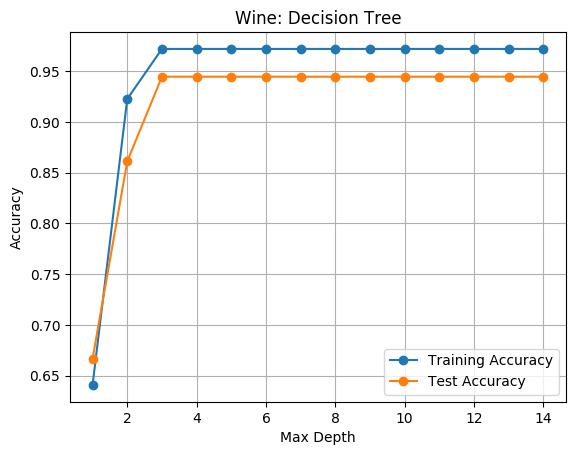

100%|██████████| 14/14 [00:00<00:00, 587.00it/s]

[0.6408450704225352, 0.9225352112676056, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493]
[0.6666666666666666, 0.8611111111111112, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444]
Runtime:  0.34635217699997156


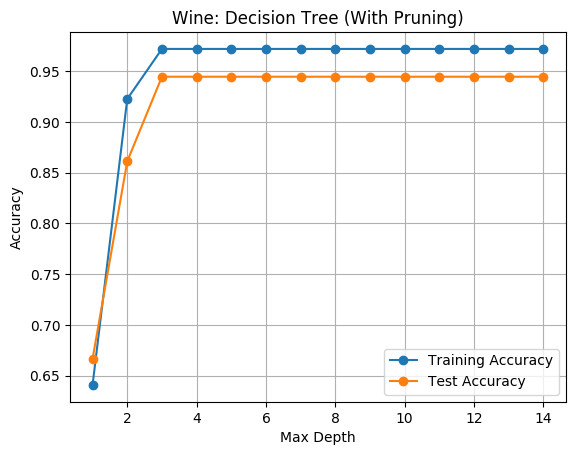

[0.6408450704225352, 0.9225352112676056, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493, 0.971830985915493]
[0.6666666666666666, 0.8611111111111112, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444]
Runtime:  0.3559045080000942


In [121]:
### Decision Tree on Dataset 2
x_train, x_test, y_train, y_test = load_dataset2()
decision_tree_change_depth(x_train, x_test, y_train, y_test, graph_title='Wine')
decision_tree_change_depth(x_train, x_test, y_train, y_test, pruning=0.006, graph_title='Wine')

[1. 1. 1. 1. 1.]
[0.74166667 0.84444444 0.88333333 0.875      0.90277778]
Runtime:  0.13773718100037513


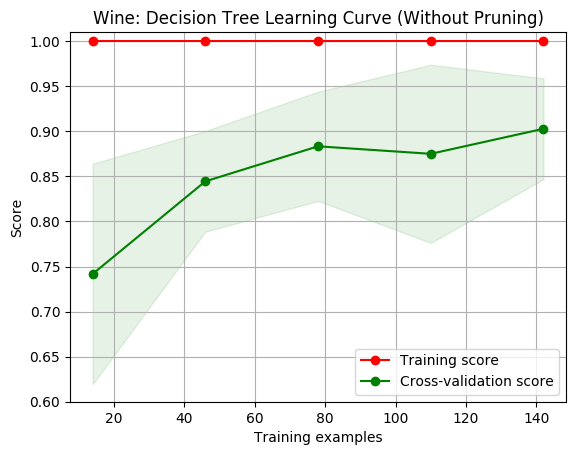

[1.         0.99565217 0.98076923 0.97818182 0.96619718]
[0.71666667 0.86666667 0.89444444 0.90277778 0.90555556]
Runtime:  0.12211690799995267


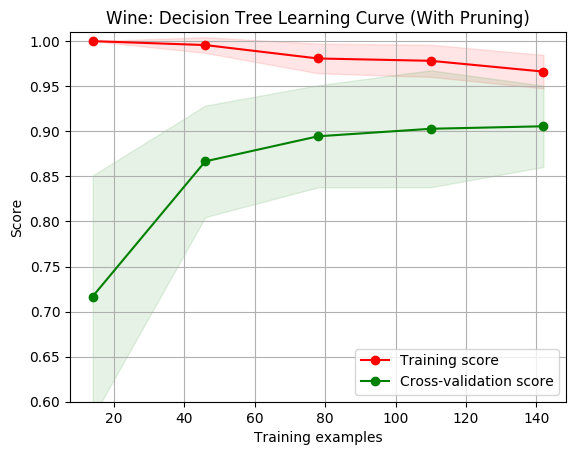

In [122]:
## Decision Tree Learning Curve Dataset 2
x_train, x_test, y_train, y_test = load_dataset2()
# Without Pruning
plot_learning_curve(DecisionTreeClassifier(max_depth=10, min_samples_leaf=1),
                   'Wine: Decision Tree Learning Curve (Without Pruning)',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.6, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()
# With Pruning
plot_learning_curve(DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_impurity_decrease=0.03),
                   'Wine: Decision Tree Learning Curve (With Pruning)',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.6, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()

# Neural Networks

In [0]:
### Neural Network Algorithm
def run_neural_network(x_train, x_test, y_train, y_test, layer_size):
  classifier = MLPClassifier(solver='adam', hidden_layer_sizes=layer_size)
  classifier.fit(x_train, y_train)
  
  train_expect = y_train
  train_predict = classifier.predict(x_train)
  
  test_expect = y_test
  test_predict = classifier.predict(x_test)
  
  return (metrics.accuracy_score(train_expect, train_predict), 
          metrics.accuracy_score(test_expect, test_predict))

In [0]:
### Neural Network with Changing Number of Hidden Layers
def neural_network_change_hidden_layer(graph_title='', dataset=1, max_layer=21):
  if dataset == 1:
    x_train, x_test, y_train, y_test = load_dataset1()
  else:
    x_train, x_test, y_train, y_test = load_dataset2()
  
  layer_sizes = range(1, max_layer)
  train_accuracies = []
  test_accuracies = []

  for layer_size in tqdm(layer_sizes):
    num = [x for x in itertools.product((13,13),repeat=layer_size)][0]
    train_accuracy, test_accuracy = run_neural_network(x_train, x_test, y_train, y_test, 
                                                layer_size = num)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

  plt.plot(layer_sizes, train_accuracies, 'o-')
  plt.plot(layer_sizes, test_accuracies, 'o-')
  plt.legend(['Training Accuracy', 'Test Accuracy'])
  plt.xlabel('Number of Hidden Layers')
  plt.ylabel('Accuracy')
  plt.title(graph_title + ': Neural Network with Changing Hidden Layers')
  plt.grid()
  plt.show()
  
  print('max')
  print(max(test_accuracies))

  print(train_accuracies)
  print(test_accuracies)

In [0]:
### Neural Network with Changing Number of Perceptrons in Hidden Layer
def neural_network_change_perceptrons(graph_title='', dataset=1, max_layer=21):
  if dataset == 1:
    x_train, x_test, y_train, y_test = load_dataset1()
  else:
    x_train, x_test, y_train, y_test = load_dataset2()
  
  layer_sizes = range(1, max_layer)
  train_accuracies = []
  test_accuracies = []

  for layer_size in tqdm(layer_sizes):
    train_accuracy, test_accuracy = run_neural_network(x_train, x_test, y_train, y_test, 
                                                layer_size = layer_size)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

  plt.plot(layer_sizes, train_accuracies, 'o-')
  plt.plot(layer_sizes, test_accuracies, 'o-')
  plt.legend(['Training Accuracy', 'Test Accuracy'])
  plt.xlabel('Number of Perceptrons in Hidden Layer')
  plt.ylabel('Accuracy')
  plt.title(graph_title + ': Neural Network with Changing Perceptron Count')
  plt.grid()
  plt.show()
  
  print('max')
  print(max(test_accuracies))

  print(train_accuracies)
  print(test_accuracies)

100%|██████████| 50/50 [00:37<00:00,  1.13s/it]


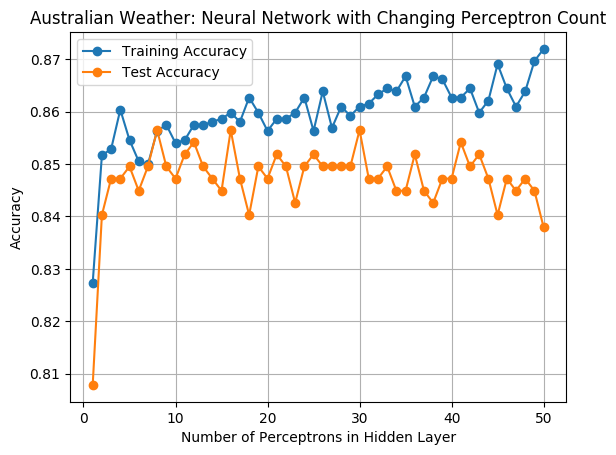

max
0.8564814814814815
[0.8273464658169177, 0.8516801853997682, 0.8528389339513326, 0.8603707995365005, 0.854577056778679, 0.8505214368482039, 0.8499420625724218, 0.8563151796060255, 0.8574739281575898, 0.8539976825028969, 0.854577056778679, 0.8574739281575898, 0.8574739281575898, 0.858053302433372, 0.8586326767091541, 0.8597914252607184, 0.858053302433372, 0.8626882966396292, 0.8597914252607184, 0.8563151796060255, 0.8586326767091541, 0.8586326767091541, 0.8597914252607184, 0.8626882966396292, 0.8563151796060255, 0.8638470451911935, 0.8568945538818077, 0.8609501738122828, 0.8592120509849362, 0.8609501738122828, 0.8615295480880649, 0.8632676709154113, 0.8644264194669756, 0.8638470451911935, 0.8667439165701043, 0.8609501738122828, 0.8626882966396292, 0.8667439165701043, 0.8661645422943222, 0.8626882966396292, 0.8626882966396292, 0.8644264194669756, 0.8597914252607184, 0.8621089223638471, 0.8690614136732329, 0.8644264194669756, 0.8609501738122828, 0.8638470451911935, 0.8696407879490151, 

In [126]:
### Neural Net on Dataset 1
neural_network_change_perceptrons('Australian Weather', dataset=1, max_layer=51)

100%|██████████| 25/25 [00:58<00:00, 12.28s/it]


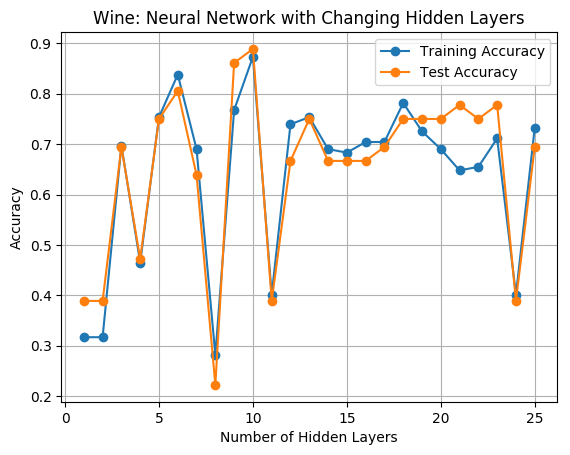

max
0.8888888888888888
[0.31690140845070425, 0.31690140845070425, 0.6971830985915493, 0.4647887323943662, 0.7535211267605634, 0.8380281690140845, 0.6901408450704225, 0.28169014084507044, 0.7676056338028169, 0.8732394366197183, 0.4014084507042254, 0.7394366197183099, 0.7535211267605634, 0.6901408450704225, 0.6830985915492958, 0.704225352112676, 0.704225352112676, 0.7816901408450704, 0.7253521126760564, 0.6901408450704225, 0.647887323943662, 0.6549295774647887, 0.7112676056338029, 0.4014084507042254, 0.7323943661971831]
[0.3888888888888889, 0.3888888888888889, 0.6944444444444444, 0.4722222222222222, 0.75, 0.8055555555555556, 0.6388888888888888, 0.2222222222222222, 0.8611111111111112, 0.8888888888888888, 0.3888888888888889, 0.6666666666666666, 0.75, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6944444444444444, 0.75, 0.75, 0.75, 0.7777777777777778, 0.75, 0.7777777777777778, 0.3888888888888889, 0.6944444444444444]


In [127]:
### Neural Net on Dataset 2
neural_network_change_hidden_layer('Wine', dataset=2, max_layer=26)

[0.82034884 0.85607143 0.85553214 0.85961107 0.86031286]
[0.81365741 0.84444444 0.84837963 0.8474537  0.85      ]
Runtime:  16.05710865600031


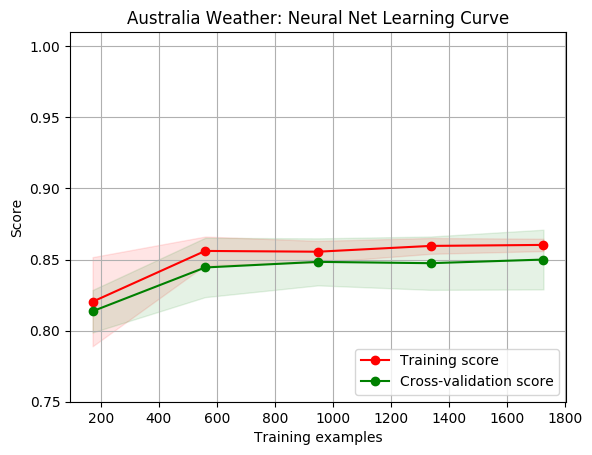

In [128]:
### Neural Net Learning Curve on Dataset 1
x_train, x_test, y_train, y_test = load_dataset1()

plot_learning_curve(MLPClassifier(solver='adam', hidden_layer_sizes=20),
                   'Australia Weather: Neural Net Learning Curve',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.75, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()

[0.82857143 0.75       0.76410256 0.72181818 0.73802817]
[0.70555556 0.71388889 0.74444444 0.725      0.68888889]
Runtime:  15.243700914999863


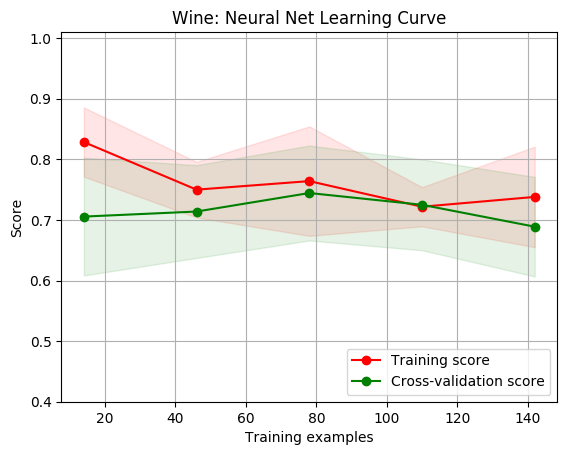

In [129]:
### Neural Net Learning Curve on Dataset 2
x_train, x_test, y_train, y_test = load_dataset2()

plot_learning_curve(MLPClassifier(solver='adam', 
                                  hidden_layer_sizes= [x for x in itertools.product((13,13),repeat=15)][0]),
                   'Wine: Neural Net Learning Curve',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.4, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()

# Boosting

[1.         0.96910714 0.96533193 0.96417352 0.94044032]
[0.76689815 0.76851852 0.76898148 0.78819444 0.78101852]
Runtime:  7.367656866999823


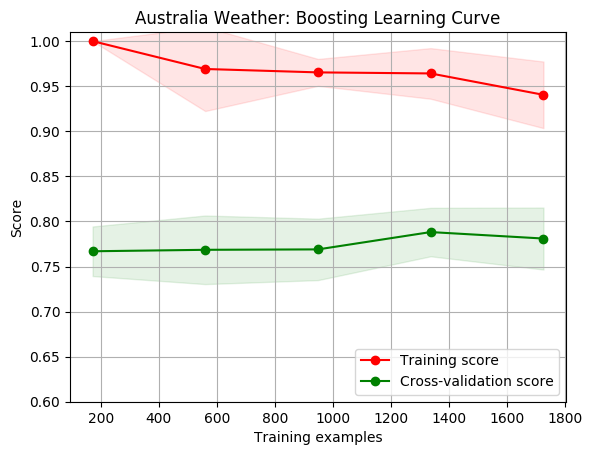

In [130]:
### Boosting Learning Curve on Dataset 1
x_train, x_test, y_train, y_test = load_dataset1()

plot_learning_curve(AdaBoostClassifier(base_estimator = 
                          DecisionTreeClassifier(max_depth = 12, random_state = 1),
                          learning_rate = 2.05, random_state = 1),
                   'Australia Weather: Boosting Learning Curve',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.6, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show() 

[1.         1.         0.96282051 0.97       0.95704225]
[0.7        0.85277778 0.85833333 0.88333333 0.88888889]
Runtime:  1.41559015599978


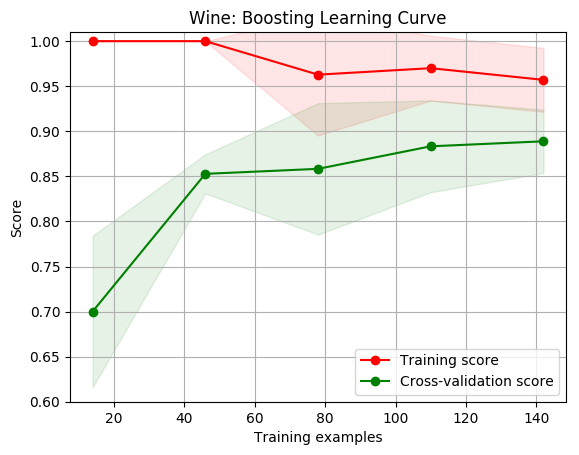

In [131]:
### Boosting Learning Curve on Dataset 2
x_train, x_test, y_train, y_test = load_dataset2()

plot_learning_curve(AdaBoostClassifier(base_estimator = 
                          DecisionTreeClassifier(max_depth = 10, random_state = 1, min_impurity_decrease=0.03),
                          learning_rate = 2, random_state = 42),
                   'Wine: Boosting Learning Curve',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.6, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()

# Support Vector Machines

In [0]:
### Support Vector Machines Algorithm
def run_svm(x_train, x_test, y_train, y_test, kernel = 'rbf'):
  classifier = svm.SVC(gamma = 0.001, kernel = kernel)
  classifier.fit(x_train, y_train)
  
  train_expect = y_train
  train_predict = classifier.predict(x_train)
  
  test_expect = y_test
  test_predict = classifier.predict(x_test)
  
  return (metrics.accuracy_score(train_expect, train_predict), 
          metrics.accuracy_score(test_expect, test_predict))

In [0]:

def svm_change_kernel(graph_title='', dataset=1):
  if dataset == 1:
    x_train, x_test, y_train, y_test = load_dataset1()
  else:
    x_train, x_test, y_train, y_test = load_dataset2()
  
  kernels = ['linear', 'sigmoid', 'rbf']
  train_accuracies = []
  test_accuracies = []
  
  for kernel in tqdm(kernels):
    train_accuracy, test_accuracy = run_svm(x_train, x_test, y_train, y_test, kernel)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
  plt.rcdefaults()
  fig, ax = plt.subplots()
  
  y_pos = np.arange(len(kernels)) + 0.2
  y_height = 0.4
  
  ax.barh(y_pos - y_height / 2, train_accuracies, 
          y_height, align='center', color='c', ecolor='black')
  ax.barh(y_pos + y_height / 2, test_accuracies, 
          y_height, align='center', color='b', ecolor='black')
  
  ax.set_yticks(y_pos)
  ax.set_yticklabels(kernels)
  ax.invert_yaxis()
  ax.set_xlabel('Accuracy')
  ax.set_title('SVM with different kernels')
  plt.title(graph_title + ': SVM with Different Kernels')
  
  plt.grid()
  plt.show()
  
  print (train_accuracies)
  print (test_accuracies)

100%|██████████| 3/3 [00:00<00:00,  9.32it/s]


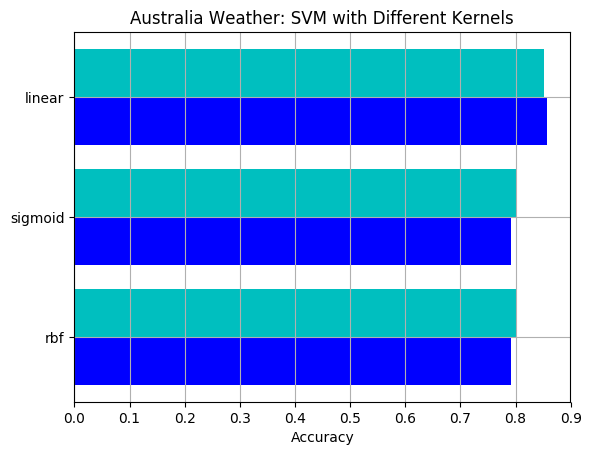

[0.8516801853997682, 0.8030127462340672, 0.8030127462340672]
[0.8564814814814815, 0.7916666666666666, 0.7916666666666666]


In [134]:
### SVM on Dataset 1
x_train, x_test, y_train, y_test = load_dataset1()
svm_change_kernel('Australia Weather', dataset = 1)

[0.84593023 0.85196429 0.85142255 0.85145849 0.85359212]
[0.83287037 0.85393519 0.85347222 0.85393519 0.85787037]
Runtime:  1.3172086780004975


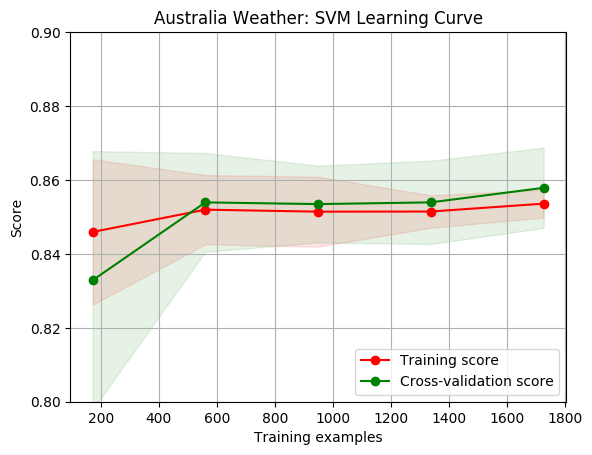

In [135]:
### SVM Learning Curve on Dataset 1
x_train, x_test, y_train, y_test = load_dataset1()
plot_learning_curve(svm.SVC(gamma = 0.001, kernel = 'linear'),
                   'Australia Weather: SVM Learning Curve',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.8, 0.9),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()

100%|██████████| 3/3 [00:00<00:00, 13.79it/s]


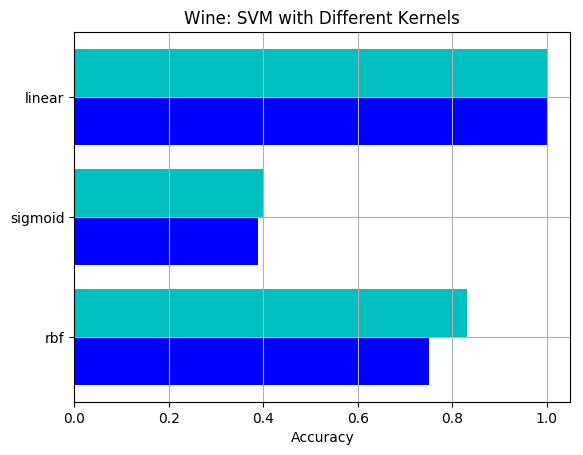

[1.0, 0.4014084507042254, 0.8309859154929577]
[1.0, 0.3888888888888889, 0.75]


In [136]:
### SVM on Dataset 2
x_train, x_test, y_train, y_test = load_dataset2()
svm_change_kernel('Wine', dataset = 2)

[1.         0.99782609 0.99871795 0.99636364 0.99507042]
[0.79444444 0.87777778 0.92222222 0.93055556 0.93333333]
Runtime:  2.1031115269997827


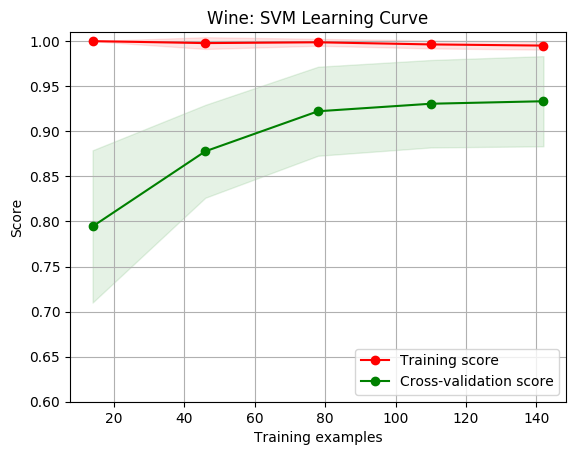

In [137]:
### SVM Learning Curve on Dataset 2
x_train, x_test, y_train, y_test = load_dataset2()
plot_learning_curve(svm.SVC(gamma = 0.001, kernel = 'linear'),
                   'Wine: SVM Learning Curve',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.6, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()

# k-Nearest Neighbors

In [0]:
### kNN Algorithm
def run_knn(x_train, x_test, y_train, y_test, k=2):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(x_train, y_train)
  
  train_expect = y_train
  train_predict = classifier.predict(x_train)
  
  test_expect = y_test
  test_predict = classifier.predict(x_test)
  
  return (metrics.accuracy_score(train_expect, train_predict), 
          metrics.accuracy_score(test_expect, test_predict))

In [0]:
### kNN Changing k Value
def knn_change_k(graph_title='', dataset=1):
  if dataset == 1:
    x_train, x_test, y_train, y_test = load_dataset1()
  else:
    x_train, x_test, y_train, y_test = load_dataset2()
    
  k_values = range(1, 11)
  train_accuracies = []
  test_accuracies = []
  
  for k_value in tqdm(k_values):
    train_accuracy, test_accuracy = run_knn(x_train, x_test, y_train, y_test, k_value)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
  plt.plot(k_values, train_accuracies, 'o-')
  plt.plot(k_values, test_accuracies, 'o-')
  plt.legend(['Training Accuracy', 'Test Accuracy'])
  plt.xlabel('k Value')
  plt.ylabel('Accuracy')
  plt.title(graph_title + ': k-NN with Changing Estimators')
  plt.grid()
  plt.show()
  
  print (train_accuracies)
  print (test_accuracies)

100%|██████████| 10/10 [00:00<00:00, 17.92it/s]


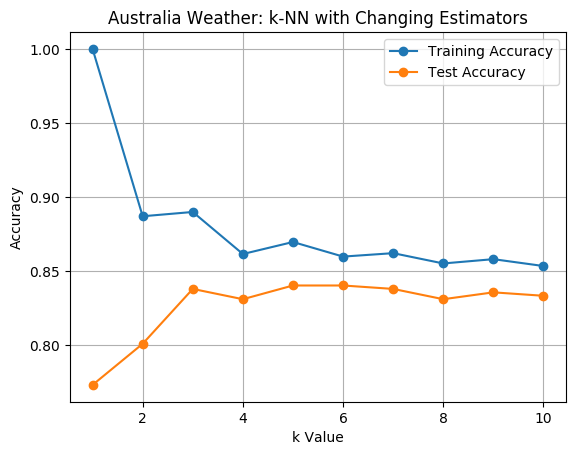

[1.0, 0.8870220162224797, 0.8899188876013905, 0.8615295480880649, 0.8696407879490151, 0.8597914252607184, 0.8621089223638471, 0.8551564310544612, 0.858053302433372, 0.8534183082271147]
[0.7731481481481481, 0.8009259259259259, 0.8379629629629629, 0.8310185185185185, 0.8402777777777778, 0.8402777777777778, 0.8379629629629629, 0.8310185185185185, 0.8356481481481481, 0.8333333333333334]


In [140]:
### k-NN on Dataset 1
knn_change_k('Australia Weather', 1)

[0.87383721 0.88428571 0.89030558 0.89035153 0.8887022 ]
[0.8099537  0.81597222 0.81782407 0.82152778 0.82222222]
Runtime:  1.1055277930008742


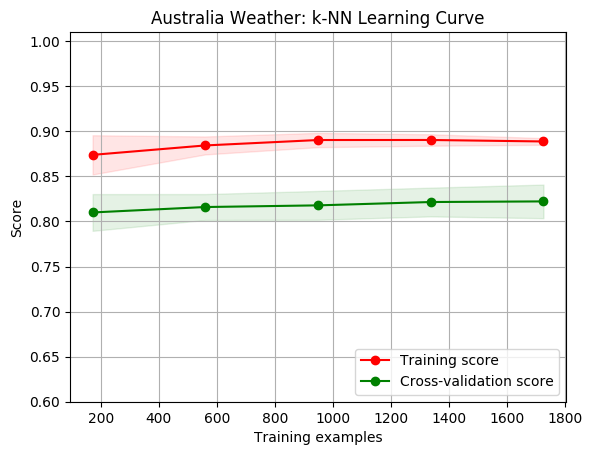

In [141]:
### kNN Learning Curve on Dataset 1
x_train, x_test, y_train, y_test = load_dataset1()
plot_learning_curve(KNeighborsClassifier(n_neighbors = 2),
                   'Australia Weather: k-NN Learning Curve',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0.6, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()

100%|██████████| 10/10 [00:00<00:00, 324.73it/s]


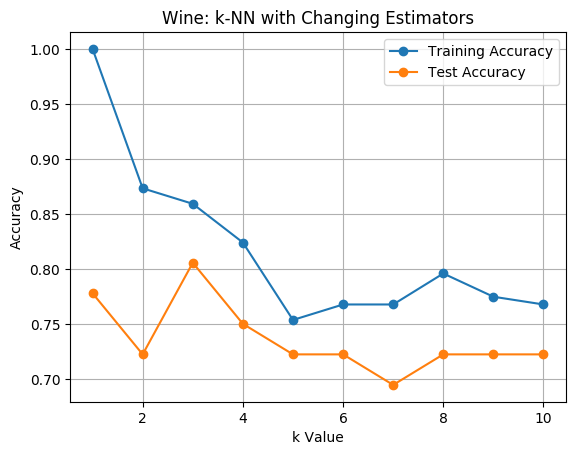

[1.0, 0.8732394366197183, 0.8591549295774648, 0.823943661971831, 0.7535211267605634, 0.7676056338028169, 0.7676056338028169, 0.795774647887324, 0.7746478873239436, 0.7676056338028169]
[0.7777777777777778, 0.7222222222222222, 0.8055555555555556, 0.75, 0.7222222222222222, 0.7222222222222222, 0.6944444444444444, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222]


In [142]:
### k-NN on Dataset 2
knn_change_k('Wine', 2)

[0.77857143 0.77173913 0.78974359 0.79454545 0.79366197]
[0.66111111 0.64166667 0.66111111 0.68333333 0.67777778]
Runtime:  0.1568259969999417


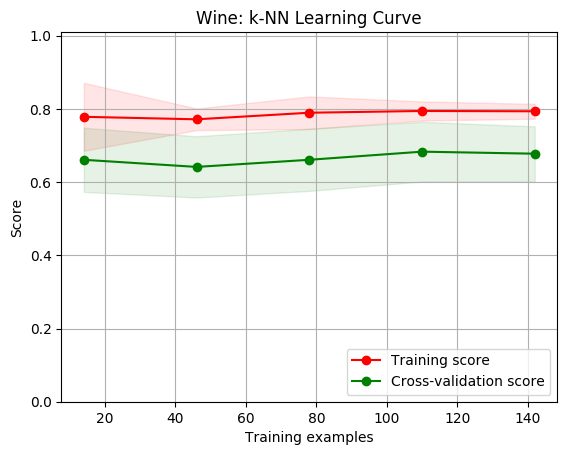

In [143]:
### kNN Learning Curve on Dataset 2
x_train, x_test, y_train, y_test = load_dataset2()
plot_learning_curve(KNeighborsClassifier(n_neighbors = 5),
                   'Wine: k-NN Learning Curve',
                   np.concatenate((x_train, x_test), axis=0), 
                   np.concatenate((y_train, y_test), axis=0), ylim=(0, 1.01),
                   cv = ShuffleSplit(n_splits=10, test_size=0.2),
                   n_jobs=-1)
plt.grid()
plt.show()